## **EDA - Product Sales**

### Report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data= pd.read_csv('../data/raw/product_sales.csv')
raw_data.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [4]:
#Descriptive statistics for each column

raw_data.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


In [5]:
# Info on data types, columns and shape of the raw data

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


<Axes: >

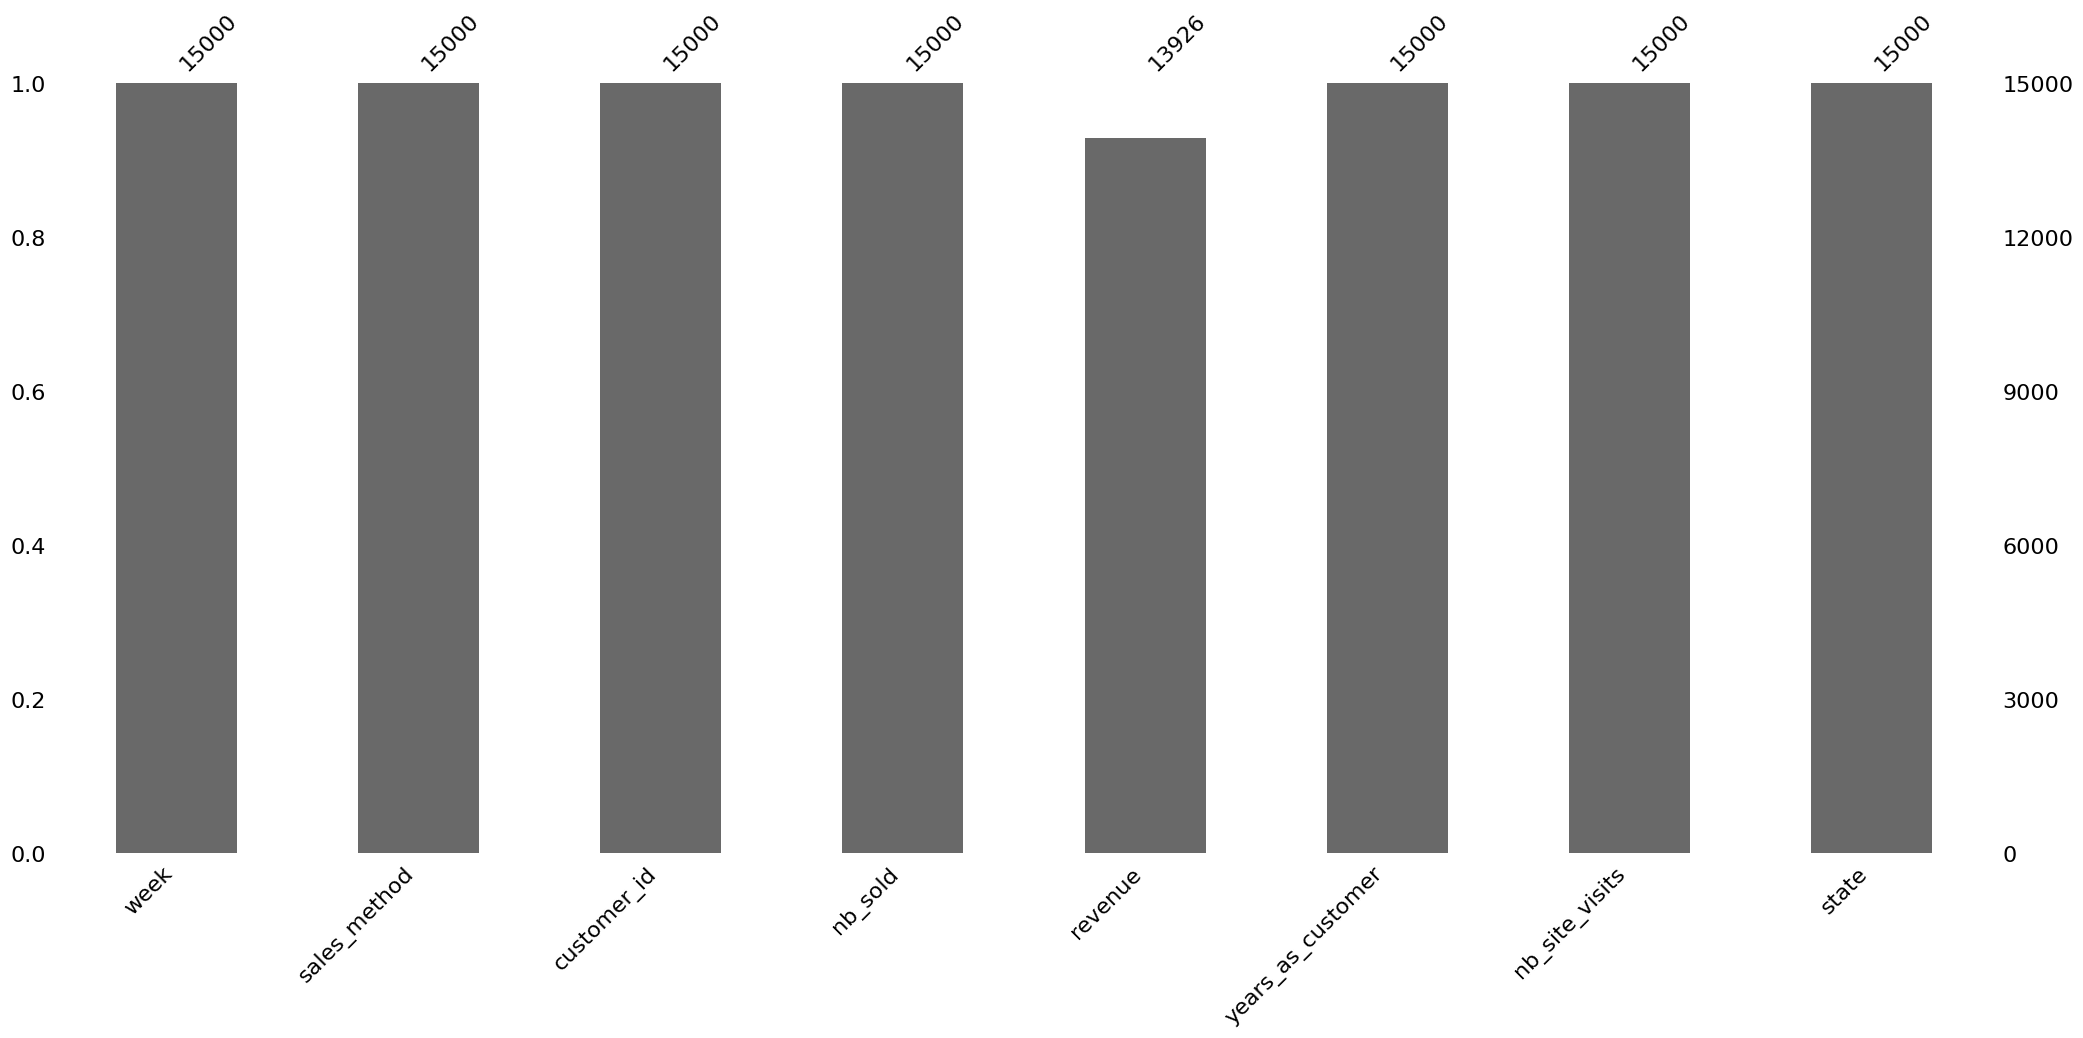

In [6]:
import missingno as msno
msno.bar(raw_data)

### After exploring the dataset we notice

#### week: 
min 1 - max 6. No missing values
#### sales_method: 
object. No missing values. Better to clean the column and change the type to category. We need to split the + and create two new columns
#### customer_id:
all unique values. no action needed
